<a href="https://colab.research.google.com/github/patriciaapenat/TFM/blob/main/Gr%C3%A1ficos/Data_Frame_uci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clonación del Repositorio GitHub de **TFM**

---



In [ ]:
! git clone https://github.com/patriciaapenat/TFM.git

Cloning into 'TFM'...
remote: Enumerating objects: 313, done.
remote: Counting objects: 100% (209/209), done.
remote: Compressing objects: 100% (163/163), done.
remote: Total 313 (delta 111), reused 80 (delta 44), pack-reused 104
Receiving objects: 100% (313/313), 17.66 MiB | 3.33 MiB/s, done.
Resolving deltas: 100% (156/156), done.


Importo algunas librerias de pandas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
sns.set()

#!pip install plotly==4.14.3

##Visualización dinámica
Instalación/carga librerías/datos utilizados

# Acceso al dataSet de Vacunación **df_UCI**



In [ ]:
df_uci =pd.read_csv ('/content/TFM/Ficheros_Depurados/df_hosp_UCI_NEW.csv')

df_uci.head(10)

,PAIS_ISO3,PAIS_NOM,INDICADOR,FECHA,ANY_SEMANA,VALOR,FUENTE_ORIGEN
0,AUT,Austria,Daily hospital occupancy,01-04-2020,2020-14,856.0,Country_Website
1,AUT,Austria,Daily hospital occupancy,02-04-2020,2020-14,823.0,Country_Website
2,AUT,Austria,Daily hospital occupancy,03-04-2020,2020-14,829.0,Country_Website
3,AUT,Austria,Daily hospital occupancy,04-04-2020,2020-14,826.0,Country_Website
4,AUT,Austria,Daily hospital occupancy,05-04-2020,2020-14,712.0,Country_Website
5,AUT,Austria,Daily hospital occupancy,06-04-2020,2020-15,824.0,Country_Website
6,AUT,Austria,Daily hospital occupancy,07-04-2020,2020-15,857.0,Country_Website
7,AUT,Austria,Daily hospital occupancy,08-04-2020,2020-15,829.0,Country_Website
8,AUT,Austria,Daily hospital occupancy,09-04-2020,2020-15,820.0,Country_Website
9,AUT,Austria,Daily hospital occupancy,10-04-2020,2020-15,771.0,Country_Website


Sustituir los valores "NaN" del campo **ISO_CONTINENTE** por **NA** que pertenece al Continente **North America"**

In [ ]:
df_vacunation=df_vacunation.fillna('NA')
df_vacunation.head()

,PAIS,PAIS_ISO3,CONTINENTE,ISO_CONTINENTE,OMS_REGION,FUENTE_DATOS,FECHA_ULT_ACTUALIZACION,TOTAL_VACUNACION_ACUM,NPER_VACUNADAS_1DOSIS,TOTAL_VACUNACION_PER100,NPER_VACUNADAS_1DOSIS_PER100,NPER_VACUNADAS_DOSIS_FULL,NPER_VACUNADAS_DOSIS_FULL_PER100,FECHA_PRIMERA_VACUNA,N_TIPOS_VACUNAS_USADAS,NPER_CON_DOSIS_ADICIONAL,NPER_CON_DOSIS_ADIDICIONAL_PER100
0,Algeria,DZA,Africa,AF,AFRO,REPORTING,04-09-2022,15267442.0,7840131,34.817,17.879,6481186,14.780,30-01-2021,4.0,575651.0,1.313
1,Angola,AGO,Africa,AF,AFRO,REPORTING,18-06-2023,25962530.0,15980639,78.994,48.623,9010599,27.416,10-03-2021,1.0,2220003.0,6.755
2,Armenia,ARM,Asia,AS,EURO,REPORTING,04-06-2023,2158796.0,1122646,72.900,37.886,996804,33.639,27-01-2021,10.0,45446.0,1.534
3,Aruba,ABW,North America,NA,AMRO,REPORTING,02-06-2023,216974.0,90449,203.224,84.717,84297,78.955,17-02-2021,2.0,35659.0,33.399
4,Brazil,BRA,South America,SA,AMRO,REPORTING,02-06-2023,513329718.0,188746389,241.499,88.797,171459392,80.664,17-01-2021,5.0,110382337.0,51.930


Creación de Pivot Table para agrupar el Total de Vacunaciones de dosis completa por Continente

In [ ]:
#Creamos una Pivot table que sume todas las vacunaciones de dosis completa por Continente
df_vacunation_continente = pd.pivot_table(
    df_vacunation,
    values = 'NPER_VACUNADAS_DOSIS_FULL',
    index = ['CONTINENTE'],
    aggfunc=sum,
    fill_value=0
    ).sort_values(by='NPER_VACUNADAS_DOSIS_FULL', ascending=True)

#Cambiamos el nombre de la columna New NPER_VACUNADAS_DOSIS_FULL a TOTAL VACUNACIONES DOSIS COMPLETA
df_vacunation_continente = df_vacunation_continente.rename(columns={ 'NPER_VACUNADAS_DOSIS_FULL':'TOTAL PERSONAS VACUNADAS DOSIS COMPLETA' })
df_vacunation_continente

,TOTAL PERSONAS VACUNADAS DOSIS COMPLETA
CONTINENTE,
Sin Determinar,1670741
Oceania,28230012
South America,334670432
North America,393649400
Africa,447834392
Europe,495901757
Asia,3435905038


Creación de Pivot Table para agrupar el Total de Vacunaciones de dosis adicional por Continente

In [ ]:
#Creamos una Pivot table que sume todas las vacunaciones de dosis Adicional por Continente
df_vacunation_continente_adicional = pd.pivot_table(
    df_vacunation,
    values = 'NPER_CON_DOSIS_ADICIONAL',
    index = ['CONTINENTE'],
    aggfunc=sum,
    fill_value=0
    ).sort_values(by='NPER_CON_DOSIS_ADICIONAL', ascending=True)

#Cambiamos el nombre de la columna New NPER_CON_DOSIS_ADICIONAL a TOTAL VACUNACIONES DOSIS ADICIONAL
df_vacunation_continente_adicional = df_vacunation_continente_adicional.rename(columns={ 'NPER_CON_DOSIS_ADICIONAL':'TOTAL PERSONAS VACUNADAS CON DOSIS ADICIONAL' })
df_vacunation_continente_adicional

,TOTAL PERSONAS VACUNADAS CON DOSIS ADICIONAL
CONTINENTE,
Sin Determinar,460418
Oceania,17928436
Africa,84548922
South America,208659287
North America,225164102
Europe,260422262
Asia,1676144307


Importamos la librería de Gráficos **Matplot**

Agrupación del dataSet df_vacunation por Continente y obtenemos un Gráfico de barras apiladas de Vacunaciones con Dosis Completa y Dosis Adicional por Continente

In [ ]:
df_vacunation_1 = df_vacunation.groupby('CONTINENTE')

<ipython-input-24-8818b1b87ac1>:13: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-24-8818b1b87ac1>:14: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Text(0, 0.5, 'N Personas Vacunadas')

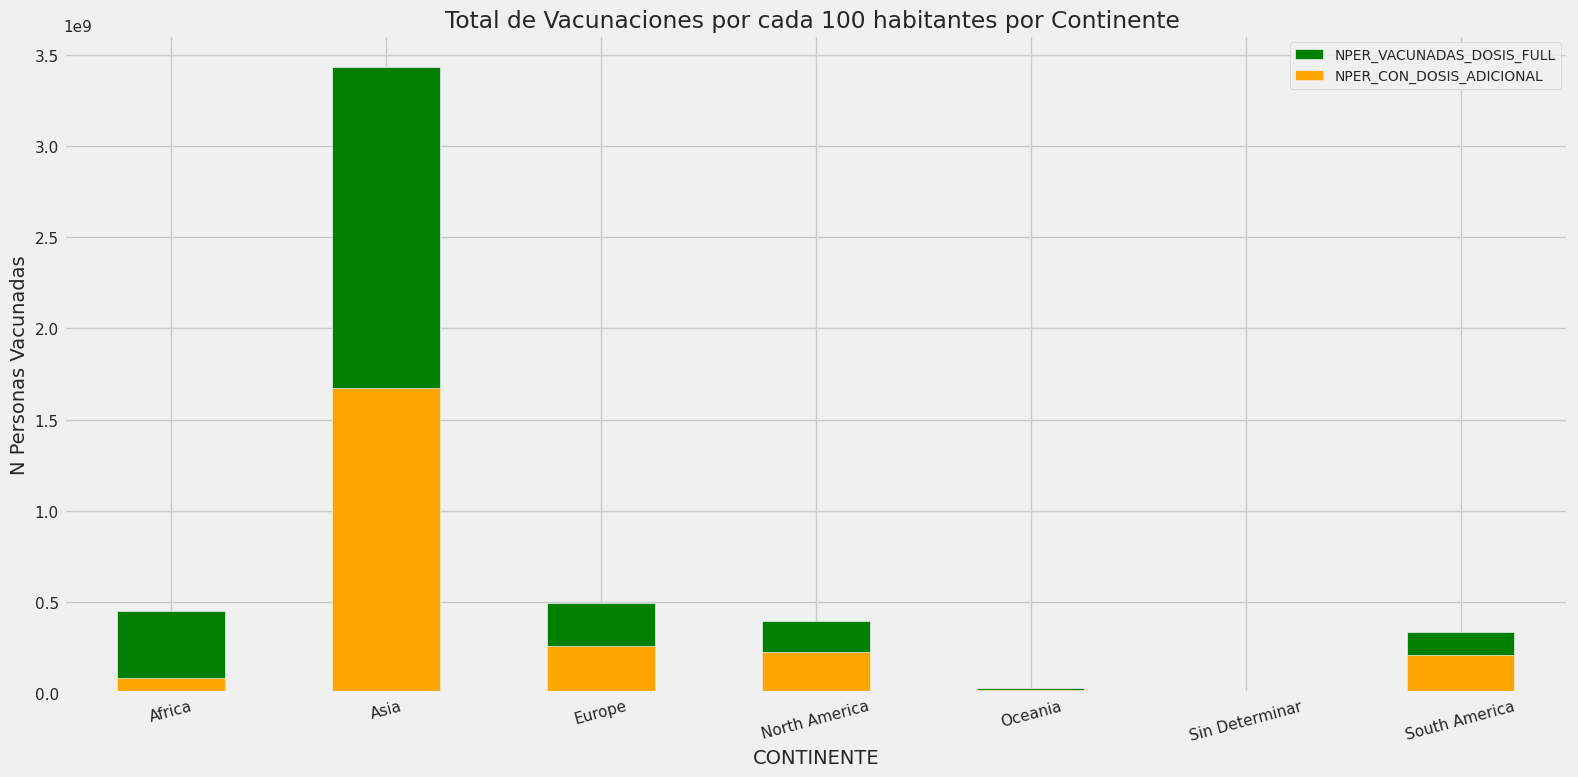

In [ ]:
#Obtenemos los datos de la pivot table y obtenemos Gráfico

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(tight_layout=True,figsize=(16,8))
scale = 'linear'

ax.set_yscale(scale)

ax.set_title(f'Total de Vacunaciones por cada 100 habitantes por Continente ', fontsize='large')

df_vacunation_1.sum()['NPER_VACUNADAS_DOSIS_FULL'].plot(kind='bar', rot=15,color='green')
df_vacunation_1.sum()['NPER_CON_DOSIS_ADICIONAL'].plot(kind='bar', rot=15,color='orange').legend(loc='best',fontsize=10)

#Leyendas en los ejes
ax.set_xlabel(f'CONTINENTE', fontsize='medium')
ax.set_ylabel(f'N Personas Vacunadas', fontsize='medium')


Top 10 de paises de Asia con Personas Vacunadas con Dosis Completa



In [ ]:
#Creamos una Pivot table que sume todas las vacunaciones por Paises del Continente Asiatico
df_vacunation_continente_asia=df_vacunation[df_vacunation['CONTINENTE']== "Asia"]
df_vacunation_continente_asia_top10 = df_vacunation_continente_asia.sort_values('NPER_VACUNADAS_DOSIS_FULL', ascending=False).head(10)

df_vacunation_continente_asia_top10 = pd.pivot_table(
    df_vacunation_continente_asia_top10,
    values = 'NPER_VACUNADAS_DOSIS_FULL',
    index = ['PAIS'],
    aggfunc=sum,
    fill_value=0
    ).sort_values(by='NPER_VACUNADAS_DOSIS_FULL', ascending=True)

#Cambiamos el nombre de la columna New test a Pruebas
df_vacunation_continente_asia_top10 = df_vacunation_continente_asia_top10.rename(columns={ 'NPER_VACUNADAS_DOSIS_FULL':'TOTAL VACUNACIONES DOSIS COMPLETA' })
df_vacunation_continente_asia_top10.head(10)


,TOTAL VACUNACIONES DOSIS COMPLETA
PAIS,
Thailand,54181443
Iran (Islamic Republic of),58575727
Philippines,78443972
Viet Nam,85958364
Japan,103392920
Pakistan,140466099
Bangladesh,141208849
Indonesia,174893201
India,952120865


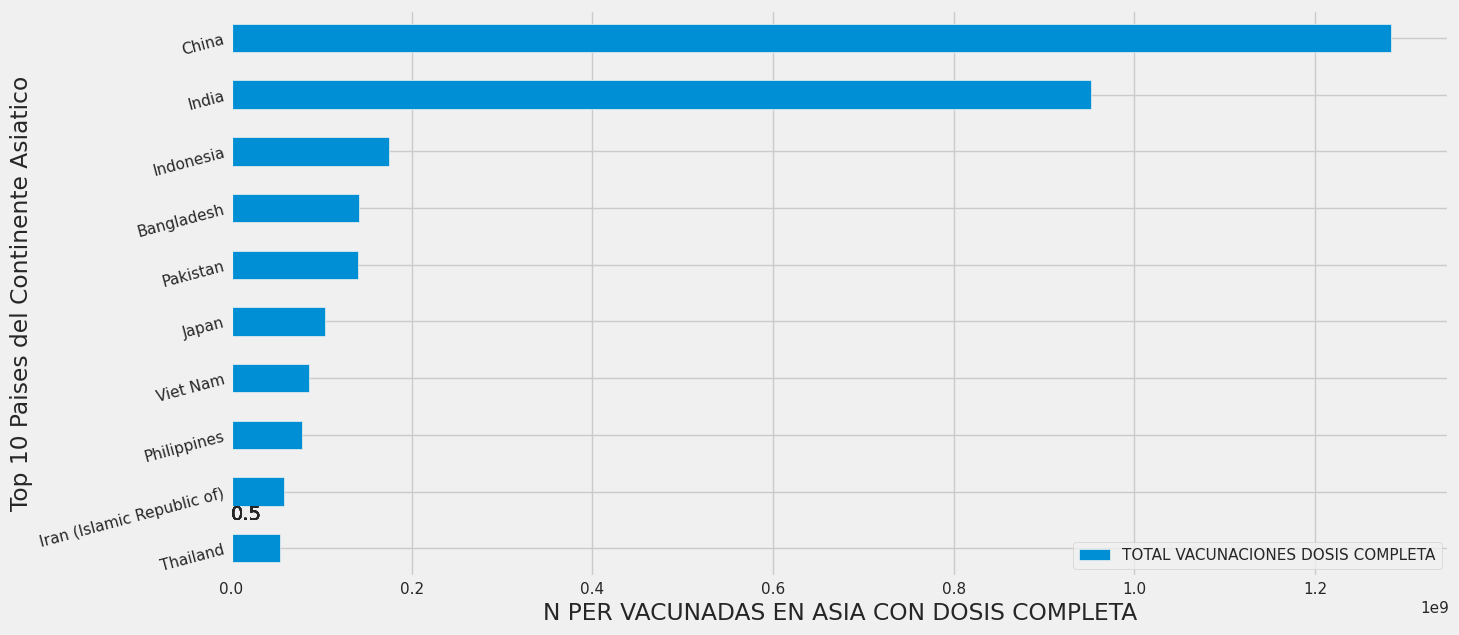

In [ ]:
#Obtenemos los datos de la pivot table y obtenemos Gráfico
axes = df_vacunation_continente_asia_top10.plot(kind='barh', rot=15)
#Leyendas en los ejes
axes.set_xlabel('N PER VACUNADAS EN ASIA CON DOSIS COMPLETA')
axes.set_ylabel('Top 10 Paises del Continente Asiatico')

fig = axes.get_figure()
#Cambiamos tamaño de gráfica
fig.set_size_inches(14,7)

#Iteramos en cada barra para pintar sus valores en la gráfica
for barh in axes.patches:
    axes.annotate(
      "{:,}".format( barh.get_height() ),
      (barh.get_x() * 1.0005, barh.get_height() * 1.005)
    )

Gráficos con la librería **Plotly**

Top 10 Paises con Total de Vacunaciones

In [ ]:
df_vacunation_paises_top10 = df_vacunation[['PAIS','NPER_VACUNADAS_DOSIS_FULL']].sort_values(by=['NPER_VACUNADAS_DOSIS_FULL'],ascending=False).head(10)
fig = px.bar(df_vacunation_paises_top10, x='NPER_VACUNADAS_DOSIS_FULL', y='PAIS', color='PAIS', title='Top 10 Paises con mayor Vacunación')
fig.show()

Top 10 Paises con menor Vacunación

In [ ]:
df_vacunation_paises_button10 = df_vacunation[['PAIS','NPER_VACUNADAS_DOSIS_FULL']].sort_values(by=['NPER_VACUNADAS_DOSIS_FULL'],ascending=False).tail(10)
fig = px.bar(df_vacunation_paises_button10, x='NPER_VACUNADAS_DOSIS_FULL', y='PAIS',color ='PAIS', title='Top 10 Paises con menor Vacunación con Dosis Completa')
fig.show()

In [ ]:
fig_recovered = px.bar(df_vacunation, x = "CONTINENTE", y = "NPER_VACUNADAS_DOSIS_FULL_PER100", color = "CONTINENTE", title = "Total de Personas Vacunadas por cada 100 habitantes")
fig_recovered.show()

Tipos de Vacunación

Tipos de Vacunas utilizadas en más paises

In [ ]:
df_vacunation_tipo =pd.read_csv ('/content/TFM/Ficheros_Depurados/df_vacunation_tipo.csv')

df_vacunation_tipo.head(10)

,PAIS_ISO3,CONTINENTE,ISO_continente,NOMBRE_VACUNA,NOMBRE_TIPO_VACUNA,NOMBRE_COMPAÑIA,FECHA_AUTORIZACION,FECHA_INICIO_VACUNACION,FUENTE_DATOS
0,SHN,Africa,AF,AstraZeneca - AZD1222,AZD1222,AstraZeneca,0,0,OWID
1,GRL,North America,NaN,Moderna - mRNA-1273,mRNA-1273,Moderna,0,0,OWID
2,FRO,Europe,EU,Moderna - mRNA-1273,mRNA-1273,Moderna,0,0,OWID
3,FRO,Europe,EU,Pfizer BioNTech - Comirnaty,Comirnaty,Pfizer BioNTech,0,0,OWID
4,BIH,Europe,EU,AstraZeneca - AZD1222,AZD1222,AstraZeneca,0,0,OWID
5,BIH,Europe,EU,Pfizer BioNTech - Comirnaty,Comirnaty,Pfizer BioNTech,0,0,OWID
6,BIH,Europe,EU,Sinovac - CoronaVac,Coronavac,Sinovac,0,0,OWID
7,JEY,Europe,EU,Moderna - mRNA-1273,mRNA-1273,Moderna,0,0,OWID
8,JEY,Europe,EU,AstraZeneca - AZD1222,AZD1222,AstraZeneca,0,0,OWID
9,JEY,Europe,EU,Pfizer BioNTech - Comirnaty,Comirnaty,Pfizer BioNTech,0,0,OWID


In [ ]:
number_of_vaccines = df_vacunation_tipo.groupby('NOMBRE_COMPAÑIA')['PAIS_ISO3'].nunique()

<Axes: ylabel='NOMBRE_COMPAÑIA'>

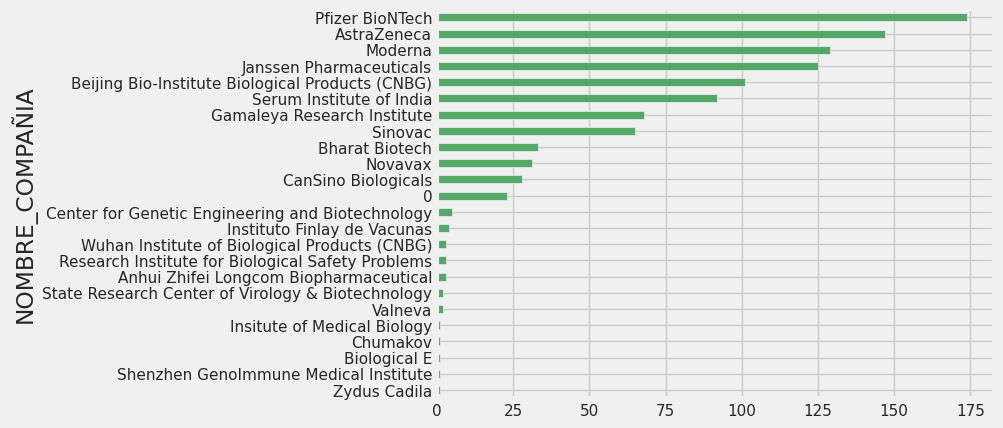

In [ ]:
number_of_vaccines.sort_values(ascending=True).plot(kind="barh", color="g")